PROYECTO DE MACHINE LEARNING ENFOCADO EN LA PREDICCION DEL USO DE BICIMAD DURANTE EL MES DE OCTUBRE 

In [1]:
# SE IMPORTAN LAS LIBRERIAS NECESARIAS PARA HACER LA INVESTIGACIÓN Y EL PROYECTO
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import sklearn 
import openpyxl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima 
from statsmodels.tsa.stattools import adfuller

In [2]:
# LEEMOS EL DATASET, SE PARSEA LA COLUMNA 'DIA' 
df = pd.read_excel('Bici1.xlsx', index_col='DIA', parse_dates=['DIA'])
df.head()

Año  Mes  Usos bicis abono anual día  \
DIA                                                 
2014-06-23  2014    6                        20.0   
2014-06-24  2014    6                        24.0   
2014-06-25  2014    6                       105.0   
2014-06-26  2014    6                       120.0   
2014-06-27  2014    6                       131.0   

            Usos bicis abono ocasional día  Usos bicis total día  Unnamed: 6  \
DIA                                                                            
2014-06-23                            79.0                  99.0         NaN   
2014-06-24                            48.0                  72.0         NaN   
2014-06-25                            14.0                 119.0         NaN   
2014-06-26                            15.0                 135.0         NaN   
2014-06-27                            18.0                 149.0         NaN   

            Usos bicis abono anual acumulado mes  \
DIA                                                
2014-06-23                                  20.0   
2014-06-24                                  44.0   
2014-06-25                                 149.0   
2014-06-26                                 269.0   
2014-06-27                                 400.0   

            Usos bicis abono ocasional acumulado mes  \
DIA                                                    
2014-06-23                                      79.0   
2014-06-24                                     127.0   
2014-06-25                                     141.0   
2014-06-26                                     156.0   
2014-06-27                                     174.0   

            Usos bicis total acumulado mes  Unnamed: 10  ...  \
DIA                                                      ...   
2014-06-23                            99.0          NaN  ...   
2014-06-24                           171.0          NaN  ...   
2014-06-25                           290.0          NaN  ...   
2014-06-26                           425.0          NaN  ...   
2014-06-27                           574.0          NaN  ...   

            Usos bicis abono ocasional acumulado año  \
DIA                                                    
2014-06-23                                      79.0   
2014-06-24                                     127.0   
2014-06-25                                     141.0   
2014-06-26                                     156.0   
2014-06-27                                     174.0   

            Usos bicis total acumulado año  Unnamed: 14  \
DIA                                                       
2014-06-23                            99.0          NaN   
2014-06-24                           171.0          NaN   
2014-06-25                           290.0          NaN   
2014-06-26                           425.0          NaN   
2014-06-27                           574.0          NaN   

            Usos abono anual acumulado  Usos abono ocasional acumulado  \
DIA                                                                      
2014-06-23                        20.0                            79.0   
2014-06-24                        44.0                           127.0   
2014-06-25                       149.0                           141.0   
2014-06-26                       269.0                           156.0   
2014-06-27                       400.0                           174.0   

            Usos total acumulado desde inicio  Unnamed: 18  \
DIA                                                          
2014-06-23                               99.0          NaN   
2014-06-24                              171.0          NaN   
2014-06-25                              290.0          NaN   
2014-06-26                              425.0          NaN   
2014-06-27                              574.0          NaN   

            Acumulado mes total  Unnamed: 20  Unnamed: 21  
DIA                                                 

In [3]:
# HACEMOS UN PLOT DE LAS DOS COLUMNAS QUE QUEREMOS UTILIZAR PARA TENER UNA PRIMERA VISUALIZACION DE LOS DATOS
def plot_df(df, x, y, title="", xlabel='Años', ylabel='Usos bicis', dpi=1000):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Usos bicis abono anual día'], title='Uso abono anual')
plot_df(df, x=df.index, y=df['Usos bicis abono ocasional día'], title='Uso abono ocasional')

In [4]:
# df.drop("Unnamed: 6", axis=1)

In [5]:
# df = df.drop(df.index[3053::])
# df

In [6]:
# VEMOS EL NOMBRE DE LAS COLUMNAS PARA ELIMINAR LAS QUE NO QUEREMOS
df.columns

Index(['Año', 'Mes', 'Usos bicis abono anual día',
       'Usos bicis abono ocasional día', 'Usos bicis total día', 'Unnamed: 6',
       'Usos bicis abono anual acumulado mes',
       'Usos bicis abono ocasional acumulado mes',
       'Usos bicis total acumulado mes', 'Unnamed: 10',
       'Usos bicis abono anual acumulado año',
       'Usos bicis abono ocasional acumulado año',
       'Usos bicis total acumulado año', 'Unnamed: 14',
       'Usos abono anual acumulado', 'Usos abono ocasional acumulado',
       'Usos total acumulado desde inicio', 'Unnamed: 18',
       'Acumulado mes total', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [7]:
# SE HACE UN DROP DE LAS COLUMNAS QUE NO SE QUIEREN 
df = df.drop(columns= ['Usos bicis total día', 'Unnamed: 6',
       'Usos bicis abono anual acumulado mes',
       'Usos bicis abono ocasional acumulado mes',
       'Usos bicis total acumulado mes', 'Unnamed: 10',
       'Usos bicis abono anual acumulado año',
       'Usos bicis abono ocasional acumulado año',
       'Usos bicis total acumulado año', 'Unnamed: 14',
       'Usos abono anual acumulado', 'Usos abono ocasional acumulado',
       'Usos total acumulado desde inicio', 'Unnamed: 18',
       'Acumulado mes total', 'Unnamed: 20', 'Unnamed: 21'], axis=1)


In [8]:
# SE VE QUE AL FINAL DE LA TABLA TENEMOS MISSINGS
df.tail()

Año  Mes  Usos bicis abono anual día  Usos bicis abono ocasional día
DIA                                                                       
NaT  1900    1                         NaN                             NaN
NaT  1900    1                         NaN                             NaN
NaT  1900    1                         NaN                             NaN
NaT  1900    1                         NaN                             NaN
NaT  1900    1                         NaN                             NaN

In [9]:
# SE HACE DROP DE LOS MISSINGS Y NOS QUEDAMOS CON UNA TABAL DE 3053 FILAS Y 4 COLUMNAS
df = df.drop(df.index[3053::])
df.head()

Año  Mes  Usos bicis abono anual día  \
DIA                                                 
2014-06-23  2014    6                        20.0   
2014-06-24  2014    6                        24.0   
2014-06-25  2014    6                       105.0   
2014-06-26  2014    6                       120.0   
2014-06-27  2014    6                       131.0   

            Usos bicis abono ocasional día  
DIA                                         
2014-06-23                            79.0  
2014-06-24                            48.0  
2014-06-25                            14.0  
2014-06-26                            15.0  
2014-06-27                            18.0

In [10]:
# df = df.drop('Acumulado mes total', axis=1)


In [11]:
df.head()

Año  Mes  Usos bicis abono anual día  \
DIA                                                 
2014-06-23  2014    6                        20.0   
2014-06-24  2014    6                        24.0   
2014-06-25  2014    6                       105.0   
2014-06-26  2014    6                       120.0   
2014-06-27  2014    6                       131.0   

            Usos bicis abono ocasional día  
DIA                                         
2014-06-23                            79.0  
2014-06-24                            48.0  
2014-06-25                            14.0  
2014-06-26                            15.0  
2014-06-27                            18.0

In [12]:
# SE HACE DROP DE LA COLUMNA AÑO 
df = df.drop('Año', axis=1)

In [13]:
# SE HACE DROP DE LA COLUMNA MES
df = df.drop('Mes', axis=1)


In [14]:
#  CONVERTIMOS EN UN DF LOS RESULTADOS DE OCTUBRE PARA HACER UNA COMPARACION DE LOS DATOS REALES CON LOS PREDECIDOS 
octubre = df.iloc[3022::]
df = df.drop(df.index[3022::])

In [15]:
# octubre

In [16]:
# df

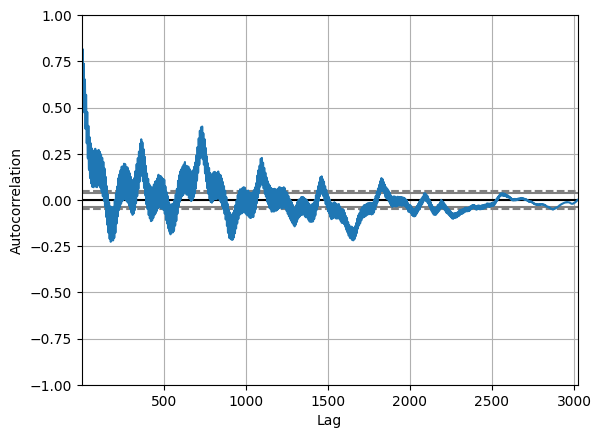

In [17]:
# HACEMOS LA GRAFICA DEL AUTOCORRELATION DE AMBAS COLUMNAS PARA VER SI HAY AUTOCORRELACION O NO
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Usos bicis abono anual día']);


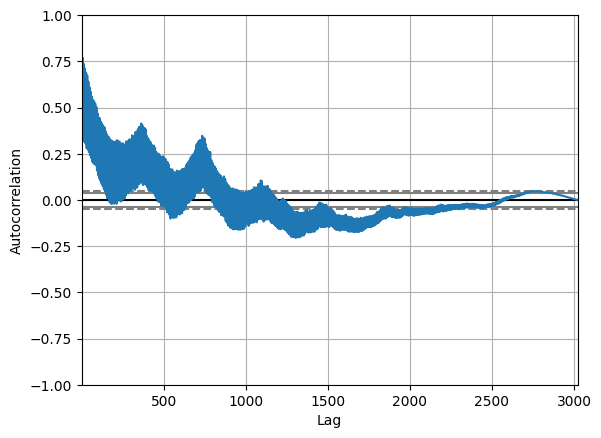

In [18]:
autocorrelation_plot(df['Usos bicis abono ocasional día']);

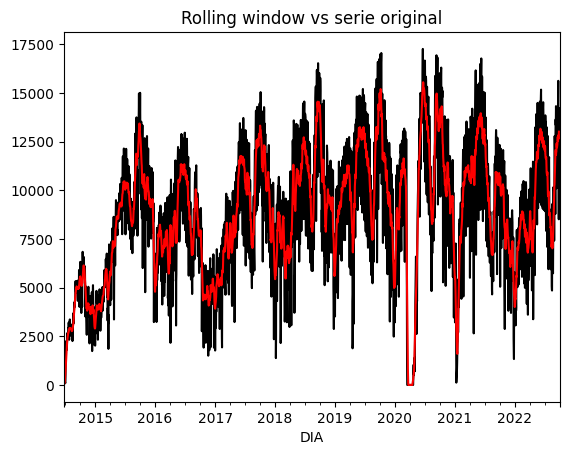

In [19]:
# BUSCAMOS LA COMPARACION ENTRE EL ROLLING WINDOW Y LA SERIE ORIGINAL
s = 12 #seasonality anual


#Moving Average
df_ma = df['Usos bicis abono anual día'].rolling(s, center=True, closed='both').mean()

df['Usos bicis abono anual día'].plot(color='k')
df_ma.plot(color = 'r', title='Rolling window vs serie original');

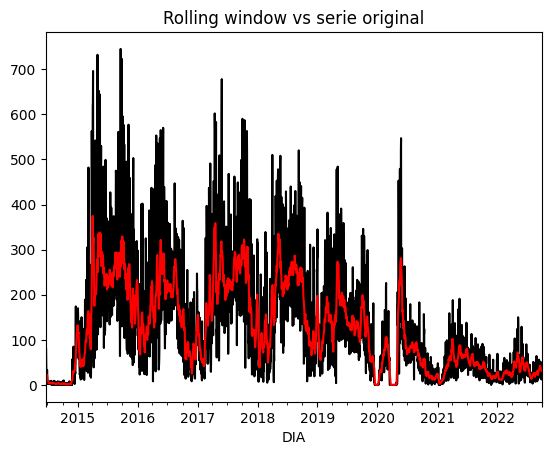

In [20]:
s = 12 #seasonality anual


#Moving Average
df_ma = df['Usos bicis abono ocasional día'].rolling(s, center=True, closed='both').mean()

df['Usos bicis abono ocasional día'].plot(color='k')
df_ma.plot(color = 'r', title='Rolling window vs serie original');

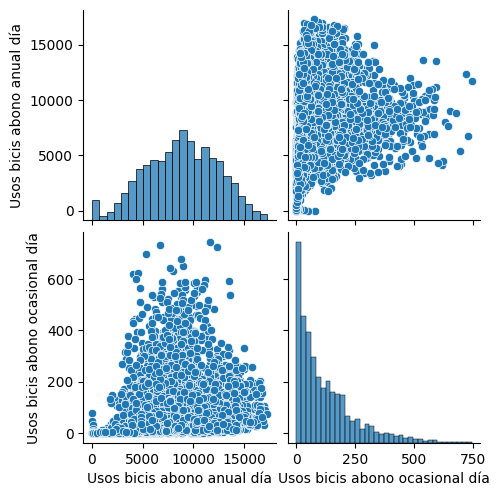

In [21]:
# HACEMOS EL PAIRPLOT DE SEABORN PARA VER COMO SE RELACIONAN LOS DATOS
sns.pairplot(data=df);

<AxesSubplot:xlabel='Años', ylabel='Uso de bicis'>

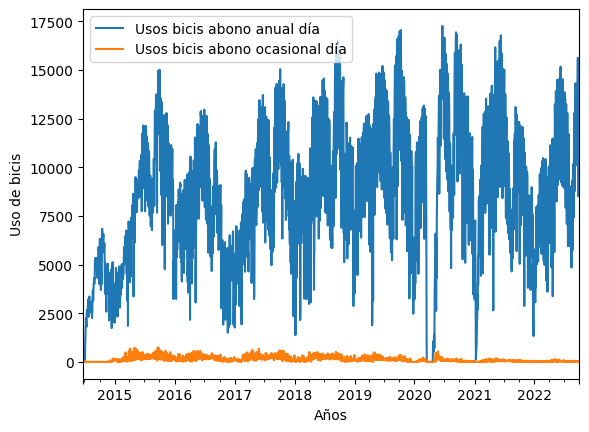

In [22]:
# SE HACE UNA GRAFICA INICIAL PARA VER COMO SE COMPARAN LOS DATOS EN LA MISMA LÍNEA DE TIEMPO
df.plot(xlabel= 'Años', ylabel= 'Uso de bicis')

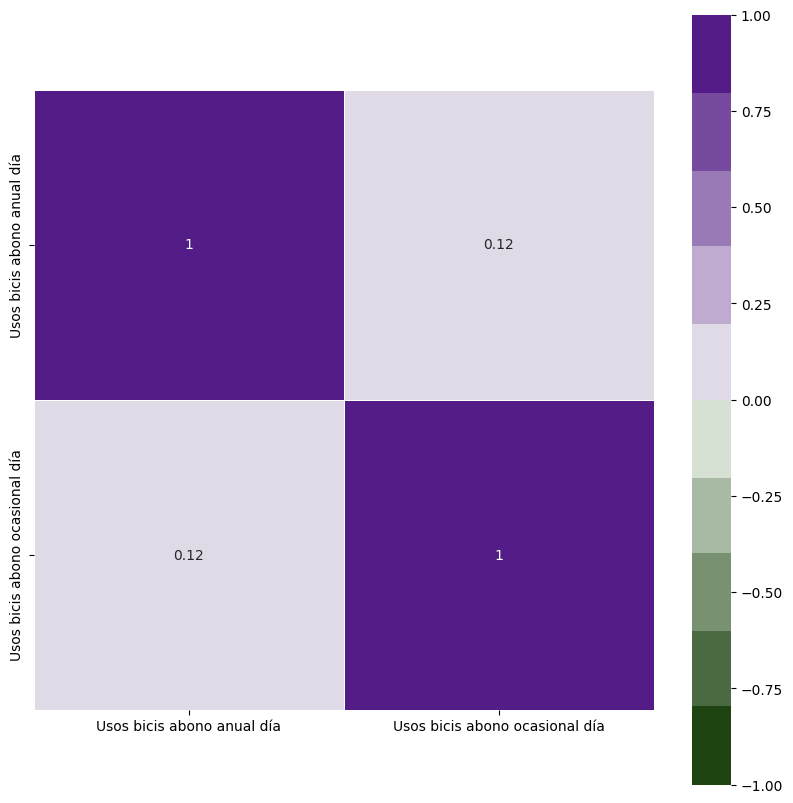

In [23]:
# SE HACE UN HEATMAP PARA VER SI HAY CORRELACION ENTRE LAS DOS VARIABLES
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(123, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

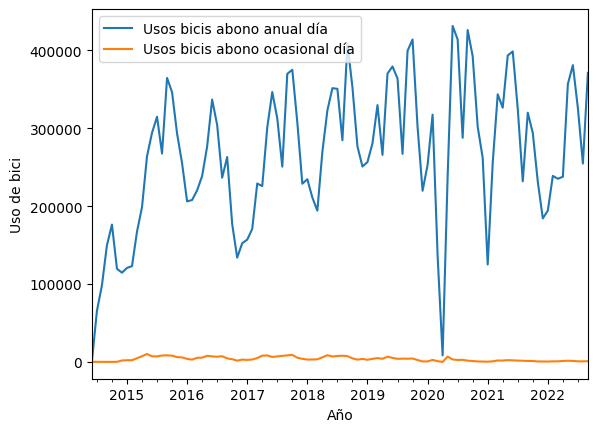

In [24]:
# GRAFICAMOS EL DF DE MANERA MENSUAL PARA QUITARLE RUIDO A LA GRAFICA ORIGINAL Y ASI VER DE MANERA MÁS PRECISA LOS DATOS
mensual = df.resample('M').sum()
mensual.plot(ylabel='Uso de bici', xlabel='Año');


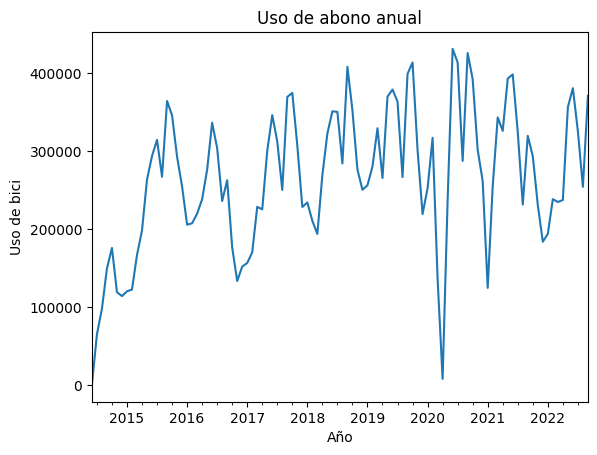

In [25]:
a =df['Usos bicis abono anual día'].resample('M').sum().plot(style='-', xlabel='Año', ylabel= 'Uso de bici', title='Uso de abono anual');

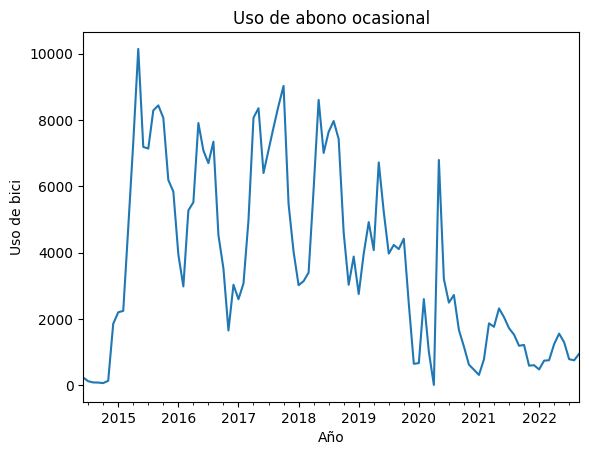

In [26]:
df['Usos bicis abono ocasional día'].resample('M').sum().plot(style='-', xlabel='Año', ylabel= 'Uso de bici', title='Uso de abono ocasional');

In [27]:
# BUSCAMOS LA MEDIA DE LAS DOS COLUMNAS PARA VER CUAL ES
df.mean()

Usos bicis abono anual día        8806.733620
Usos bicis abono ocasional día     124.560225
dtype: float64

Lun     43918.0
Mar     36789.0
Mier    35558.0
Jue     38725.0
Vie     47188.0
Sab     85970.0
Dom     88273.0
Name: Usos bicis abono ocasional día, dtype: float64


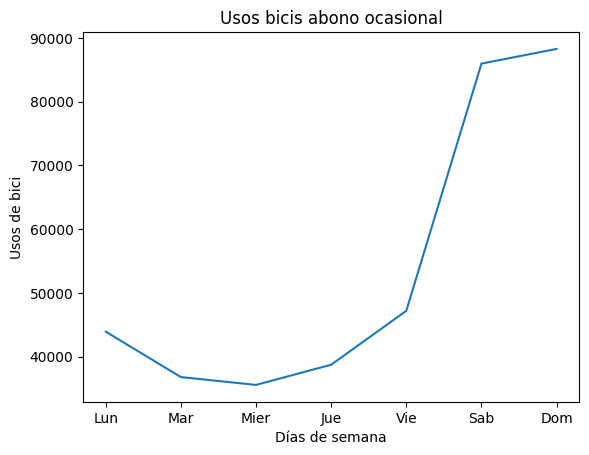

In [57]:
# JUNTAMOS DE MANERA DIARIA LOS DATOS DE LAS COLUMNAS PARA INTENTAR VISUALIZAR ALGUNAS TENDENCIAS
dia_semana = df['Usos bicis abono ocasional día'].groupby(df.index.dayofweek).sum()

dia_semana.index = ['Lun', 'Mar', "Mier", "Jue", "Vie", "Sab", "Dom"]
print(dia_semana)
dia_semana.plot(style=['-'], xlabel='Días de semana', ylabel= 'Usos de bici', title= 'Usos bicis abono ocasional');

Lun     3766391.0
Mar     4109568.0
Mier    4261434.0
Jue     4263229.0
Vie     4093410.0
Sab     3205216.0
Dom     2914701.0
Name: Usos bicis abono anual día, dtype: float64


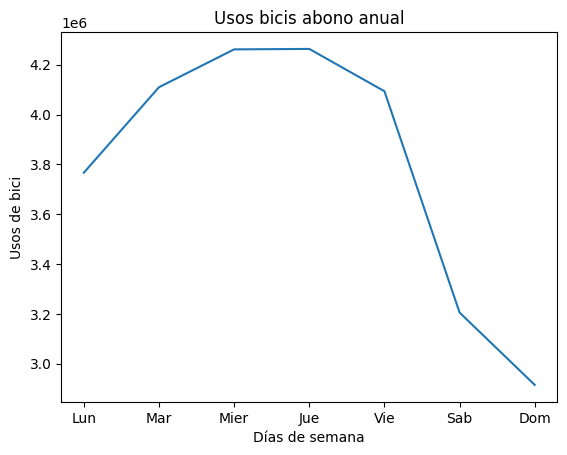

In [56]:
by_weekday1 = df['Usos bicis abono anual día'].groupby(df.index.dayofweek).sum()

by_weekday1.index = ['Lun', 'Mar', "Mier", "Jue", "Vie", "Sab", "Dom"]
print(by_weekday1)
by_weekday1.plot(style=['-'], xlabel='Días de semana', ylabel= 'Usos de bici', title= 'Usos bicis abono anual');

      Usos bicis abono anual día  Usos bicis abono ocasional día
Ene                    1547265.0                         15999.0
Feb                    1805290.0                         19551.0
Mar                    1856104.0                         26976.0
Abr                    1771287.0                         33920.0
May                    2522639.0                         52393.0
Jun                    2920478.0                         39708.0
Jul                    2776571.0                         37677.0
Ago                    2179327.0                         40708.0
Sept                   3072787.0                         36839.0
Oct                    2528061.0                         32099.0
Nov                    1966248.0                         20167.0
Dic                    1667892.0                         20384.0


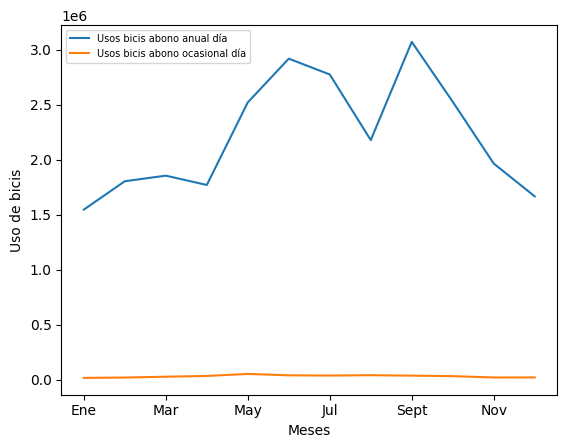

In [31]:
# BUSCAMOS UNA TENDENCIA MENSUAL DE LOS DATOS DEL DF
por_mes = df.groupby(df.index.month).sum()
por_mes.index=['Ene', 'Feb', 'Mar','Abr','May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic']
print(por_mes)
por_mes.plot(xlabel='Meses', ylabel='Uso de bicis')
plt.legend(loc='upper left', fontsize=7);

In [32]:
# HACEMOS EL TEST DE DICKEY FULLER PARA VERIFICAR SI LOS DATOS SON ESTACIONARIOS O NO 
def ad_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print('1. ADF:', dftest[0])
    print('2. P-value:', dftest[1])
    print('3. Number of lags:', dftest[2])
    print('4. Nume of observtions used for ADF Regression and Critical Values Calculation:', dftest[3])
    print('5. Critical Values:')
    for key, val in dftest[4].items():
        print('\t', key, ":", val)

In [33]:

ad_test(df['Usos bicis abono anual día'])

1. ADF: -5.618855985218197
2. P-value: 1.157482134415131e-06
3. Number of lags: 29
4. Nume of observtions used for ADF Regression and Critical Values Calculation: 2992
5. Critical Values:
	 1% : -3.432537472983712
	 5% : -2.8625064838167327
	 10% : -2.5672844849053806


In [34]:
ad_test((df['Usos bicis abono ocasional día']))

1. ADF: -3.195296492207284
2. P-value: 0.02025855611195721
3. Number of lags: 28
4. Nume of observtions used for ADF Regression and Critical Values Calculation: 2993
5. Critical Values:
	 1% : -3.432536741492438
	 5% : -2.862506160743024
	 10% : -2.5672843129045173


In [35]:
# HACEMOS EL AUTO_ARIMA PARA BUSCAR EL MODELO QUE MEJOR ENCAJE EN LOS DATOS
stepwise_fit = auto_arima(df['Usos bicis abono ocasional día'], trace= True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34491.612, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35627.201, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35629.200, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=35629.203, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35625.202, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34687.613, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34574.711, Time=0.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=34380.422, Time=2.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=34540.555, Time=1.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=33824.932, Time=3.51 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=34393.478, Time=1.63 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=33668.105, Time=4.02 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=33953.545, Time=1.54 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=33673.967, Time=4.11 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3022
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -16824.813
Date:                Mon, 05 Dec 2022   AIC                          33665.626
Time:                        09:32:07   BIC                          33713.733
Sample:                    06-23-2014   HQIC                         33682.924
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3934      0.018     21.307      0.000       0.357       0.430
ar.L2         -0.7704      0.015    -51.640      0.000      -0.800      -0.741
ar.L3         -0.1805      0.019     -9.365      0.000      -0.218      -0.143
ar.L4         -0.3240      0.015    -21.688      0.000      -0.353      -0.295
ar.L5         -0.3673      0.016    -22.467      0.000      -0.399      -0.335
ma.L1         -0.8276      0.017    -47.392      0.000      -0.862      -0.793
ma.L2          0.6444      0.015     43.561      0.000       0.615       0.673
sigma2      4056.8739     57.846     70.132      0.000    3943.498    4170.250
===================================================================================
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):              2944.29
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
stepwise_fit = auto_arima(df['Usos bicis abono anual día'], trace= True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=53191.123, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54172.402, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54174.093, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54173.761, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54170.417, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53501.871, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=53442.589, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=53015.490, Time=2.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=53402.165, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=52602.586, Time=3.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=53177.029, Time=0.69 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=52585.160, Time=3.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=52911.331, Time=0.75 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=52585.167, Time=4.31 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3022
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -26114.530
Date:                Mon, 05 Dec 2022   AIC                          52249.059
Time:                        09:33:30   BIC                          52309.193
Sample:                    06-23-2014   HQIC                         52270.682
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8016      0.003    240.091      0.000       0.795       0.808
ar.L2         -1.4385      0.004   -376.827      0.000      -1.446      -1.431
ar.L3          0.7941      0.004    186.679      0.000       0.786       0.802
ar.L4         -0.9933      0.003   -350.354      0.000      -0.999      -0.988
ma.L1         -1.1732      0.014    -82.132      0.000      -1.201      -1.145
ma.L2          1.6316      0.018     90.295      0.000       1.596       1.667
ma.L3         -1.2903      0.024    -53.511      0.000      -1.338      -1.243
ma.L4          1.1589      0.018     65.114      0.000       1.124       1.194
ma.L5         -0.3636      0.015    -23.905      0.000      -0.393      -0.334
sigma2        2.2e+06   3.68e-09   5.97e+14      0.000     2.2e+06     2.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.65   Jarque-Bera (JB):              3029.06
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.99e+30. Standard errors may be unstable.
"""

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
# DIVIDIMOS EN TEST Y SHAPE 
print(df.shape)
train = df
test =  octubre
print(train.shape)
print(test.shape)

(3022, 2)
(3022, 2)
(31, 2)


In [39]:
# AQUÍ IMPORTAMOS STATSMODELS.API, ESTA LIBRERIA ME FUNCIONA EL MODELO ARIMA

import statsmodels.api as sm

In [40]:
# HACEMOS EL MODELO ARIMA
model = sm.tsa.arima.ARIMA(df['Usos bicis abono ocasional día'], order=(5,1,2))
result = model.fit()
result.summary()

c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Usos bicis abono ocasional día   No. Observations:                 3022
Model:                             ARIMA(5, 1, 2)   Log Likelihood              -16824.813
Date:                            Mon, 05 Dec 2022   AIC                          33665.626
Time:                                    09:33:32   BIC                          33713.733
Sample:                                06-23-2014   HQIC                         33682.924
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3934      0.018     21.307      0.000       0.357       0.430
ar.L2         -0.7704      0.015    -51.640      0.000      -0.800      -0.741
ar.L3         -0.1805      0.019     -9.365      0.000      -0.218      -0.143
ar.L4         -0.3240      0.015    -21.688      0.000      -0.353      -0.295
ar.L5         -0.3673      0.016    -22.467      0.000      -0.399      -0.335
ma.L1         -0.8276      0.017    -47.392      0.000      -0.862      -0.793
ma.L2          0.6444      0.015     43.561      0.000       0.615       0.673
sigma2      4056.8739     57.846     70.132      0.000    3943.498    4170.250
===================================================================================
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):              2944.29
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# HACEMOS LA PREDICCIÓN
start = len(train)
end=len(train) + len(test) -1

pred = result.predict(start=start, end=end, typ='levels')
print(pred)
# pred.index=df.index[start:end]

2022-10-01    32.511565
2022-10-02    24.235184
2022-10-03    18.263253
2022-10-04    15.558985
2022-10-05    18.133501
2022-10-06    25.535956
2022-10-07    31.927933
2022-10-08    31.344731
2022-10-09    25.013761
2022-10-10    18.474540
2022-10-11    16.094643
2022-10-12    19.180099
2022-10-13    25.673269
2022-10-14    30.724480
2022-10-15    30.325388
2022-10-16    24.979277
2022-10-17    19.034604
2022-10-18    16.865007
2022-10-19    19.830229
2022-10-20    25.620052
2022-10-21    29.894822
2022-10-22    29.467309
2022-10-23    24.796876
2022-10-24    19.552121
2022-10-25    17.652372
2022-10-26    20.356975
2022-10-27    25.501558
2022-10-28    29.199592
2022-10-29    28.744804
2022-10-30    24.609758
2022-10-31    20.005538
Freq: D, Name: predicted_mean, dtype: float64


In [42]:
model = sm.tsa.arima.ARIMA(df['Usos bicis abono anual día'], order=(4,1,5))
result = model.fit()
result.summary()

c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Usos bicis abono anual día   No. Observations:                 3022
Model:                         ARIMA(4, 1, 5)   Log Likelihood              -26114.530
Date:                        Mon, 05 Dec 2022   AIC                          52249.059
Time:                                09:33:37   BIC                          52309.193
Sample:                            06-23-2014   HQIC                         52270.682
                                 - 09-30-2022                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8016      0.003    240.091      0.000       0.795       0.808
ar.L2         -1.4385      0.004   -376.827      0.000      -1.446      -1.431
ar.L3          0.7941      0.004    186.679      0.000       0.786       0.802
ar.L4         -0.9933      0.003   -350.354      0.000      -0.999      -0.988
ma.L1         -1.1732      0.014    -82.132      0.000      -1.201      -1.145
ma.L2          1.6316      0.018     90.295      0.000       1.596       1.667
ma.L3         -1.2903      0.024    -53.511      0.000      -1.338      -1.243
ma.L4          1.1589      0.018     65.114      0.000       1.124       1.194
ma.L5         -0.3636      0.015    -23.905      0.000      -0.393      -0.334
sigma2        2.2e+06   3.68e-09   5.97e+14      0.000     2.2e+06     2.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.65   Jarque-Bera (JB):              3029.06
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.99e+30. Standard errors may be unstable.
"""

In [43]:
start = len(train)
end=len(train) + len(test) -1
pred1 = result.predict(start=start, end=end, typ='levels')
print(pred1)

2022-10-01    10176.763212
2022-10-02     9468.946245
2022-10-03    11408.598655
2022-10-04    13100.835871
2022-10-05    13330.301137
2022-10-06    13323.240216
2022-10-07    12404.606908
2022-10-08    10179.703592
2022-10-09     9484.187934
2022-10-10    11404.795988
2022-10-11    13090.568923
2022-10-12    13336.724065
2022-10-13    13324.998769
2022-10-14    12392.401311
2022-10-15    10182.688571
2022-10-16     9499.155294
2022-10-17    11401.060585
2022-10-18    13080.537896
2022-10-19    13342.977201
2022-10-20    13326.607746
2022-10-21    12380.440596
2022-10-22    10185.715841
2022-10-23     9513.854165
2022-10-24    11397.392158
2022-10-25    13070.737126
2022-10-26    13349.063349
2022-10-27    13328.071511
2022-10-28    12368.720015
2022-10-29    10188.783173
2022-10-30     9528.290267
2022-10-31    11393.790397
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CALCULAMOS LOS ERRORES DE PREDDICION
MAE = mean_absolute_error
MSE = mean_squared_error
r2 = r2_score

print(MAE(pred, octubre['Usos bicis abono anual día']))
print(MSE(pred, octubre['Usos bicis abono anual día']))
print(r2(pred, octubre['Usos bicis abono anual día']))

11252.415865053148
131510797.31274834
-4864580.616964845


In [45]:

print(MAE(pred1, octubre['Usos bicis abono ocasional día']))
print(MSE(pred1, octubre['Usos bicis abono ocasional día']))
print(r2(pred1, octubre['Usos bicis abono ocasional día']))


11709.759958578461
139313542.77459285
-63.432608294747126


In [46]:
# plot_acf(df['Usos bicis abono anual día']);

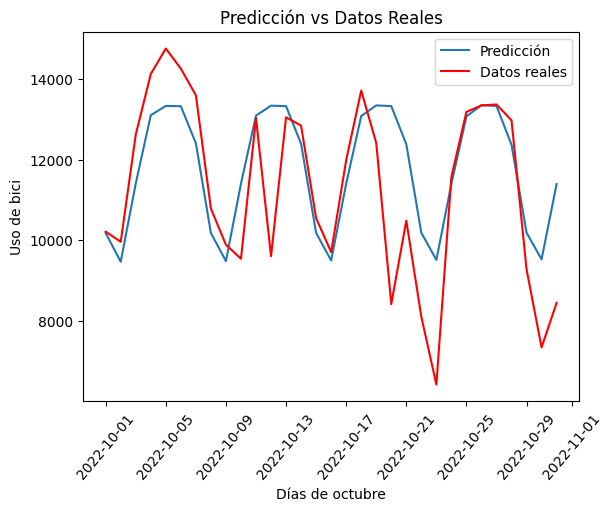

In [47]:
# HACEMOS UNA GRAFICA PARA VER LA DIFERENCIA ENTRE LA PREDICCION Y LOS RESULTADOS REALES
plt.plot(pred1, label='Predicción')
plt.plot(octubre['Usos bicis abono anual día'],color='red', label='Datos reales')
plt.xlabel("Días de octubre")
plt.ylabel('Uso de bici')
plt.title('Predicción vs Datos Reales')
plt.xticks(rotation=50)
plt.legend(loc='best');

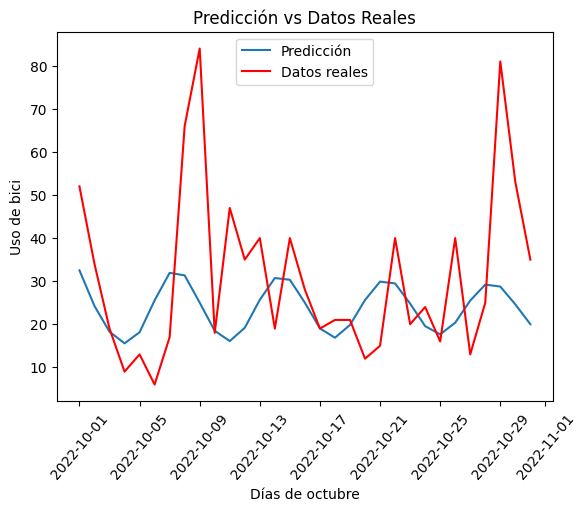

In [48]:
plt.plot(pred, label='Predicción')
plt.plot(octubre['Usos bicis abono ocasional día'],color='red', label='Datos reales')
plt.xlabel("Días de octubre")
plt.ylabel('Uso de bici')
plt.title('Predicción vs Datos Reales')
plt.xticks(rotation=50)
plt.legend(loc='best');

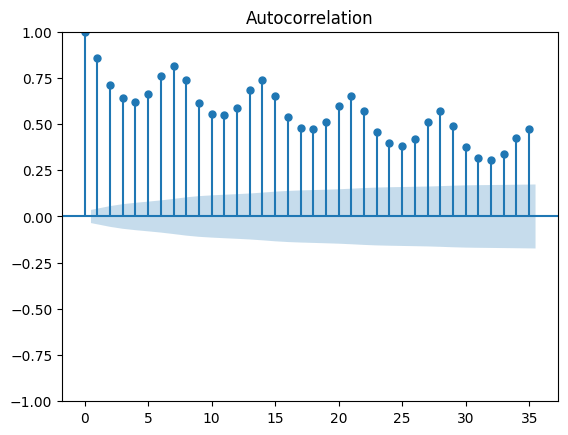

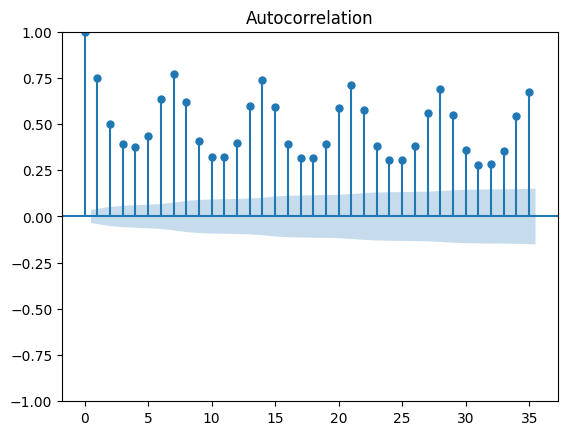

In [53]:
plot_acf(df['Usos bicis abono anual día']);
plot_acf(df['Usos bicis abono ocasional día']);

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse



# # descomposición multiplicativa
# # result_mul = seasonal_decompose(df["Usos bicis abono ocasional día"], model = "multiplicative", extrapolate_trend = "freq")

# # descomposición aditiva
# result_add = seasonal_decompose(df["Usos bicis abono ocasional día"], model = "additive", extrapolate_trend = "freq")


In [ ]:
# result_add.plot();

In [ ]:
# df_reconstructed = pd.concat([result_add.seasonal,
# result_add.trend,
# result_add.resid,
# result_add.observed], axis = 1)

# df_reconstructed.head()

In [ ]:
# # descomposición multiplicativa
# result_mul = seasonal_decompose(df["Usos bicis abono anual día"], model = "multiplicative", extrapolate_trend = "freq")

# descomposición aditiva
# result_add = seasonal_decompose(df["Usos bicis abono anual día"], model = "additive", extrapolate_trend = "freq")


In [ ]:
# result_add.plot();

In [ ]:
# df_reconstructed = pd.concat([result_add.seasonal,
# result_add.trend,
# result_add.resid,
# result_add.observed], axis = 1)

# df_reconstructed.head()

In [ ]:
# detrended = df["Usos bicis abono anual día"].values - result_add.trend
# plt.plot(detrended)
# plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

In [ ]:
# adfuller(detrended.values)

In [ ]:
# df["diff"] = df["Usos bicis abono anual día"].diff()
# df.head()

In [ ]:
# plt.plot(df["Usos bicis abono anual día"].diff())


In [ ]:
# plt.plot(df["Usos bicis abono ocasional día"].diff())